In [2]:
# Exercise - load basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Plot styling
import seaborn as sns; sns.set()  # for plot styling

Matplot configuration

In [4]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9) #plot size
plt.style.use('ggplot') #Data Viz library R 

### Data Import

In [6]:
# Exercise: Read the csv file into a variable called dataset
dataset = pd.read_csv('CLV.csv')
#preview
dataset.head(10)

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
5,192,148
6,294,153
7,263,173
8,199,162
9,168,174


### Exploratory Data Analysis

In [7]:
#Exercise: Explore your data
dataset.shape

(303, 2)

In [8]:
dataset.describe()

,INCOME,SPEND
count,303.000000,303.000000
mean,245.273927,149.646865
std,48.499412,22.905161
min,126.000000,71.000000
25%,211.000000,133.500000
50%,240.000000,153.000000
75%,274.000000,166.000000
max,417.000000,202.000000


In [9]:
dataset.dtypes

INCOME    int64
SPEND     int64
dtype: object

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  303 non-null    int64
 1   SPEND   303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


In [11]:
dataset.isnull().sum()

INCOME    0
SPEND     0
dtype: int64

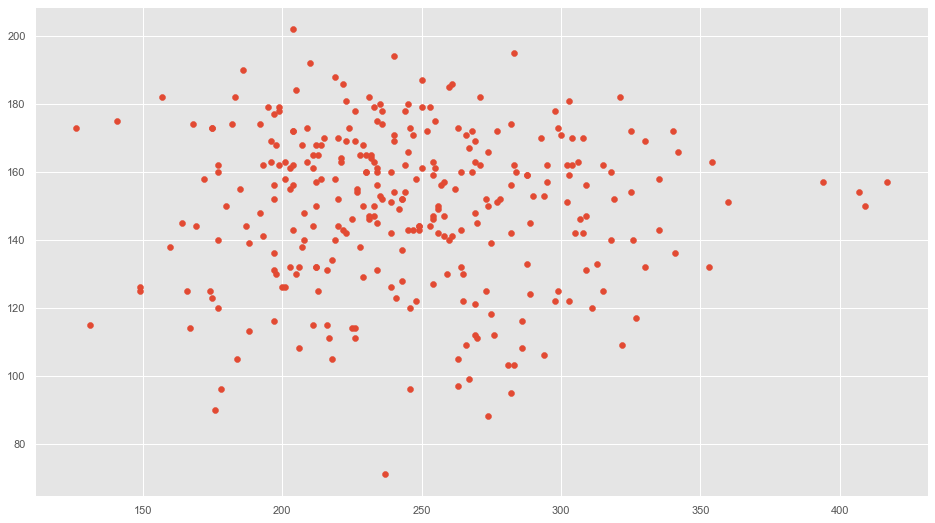

In [12]:
#Make a scatterplot and boxpot of Income versus spend

plt.scatter(dataset['INCOME'],dataset['SPEND'])


<AxesSubplot:>

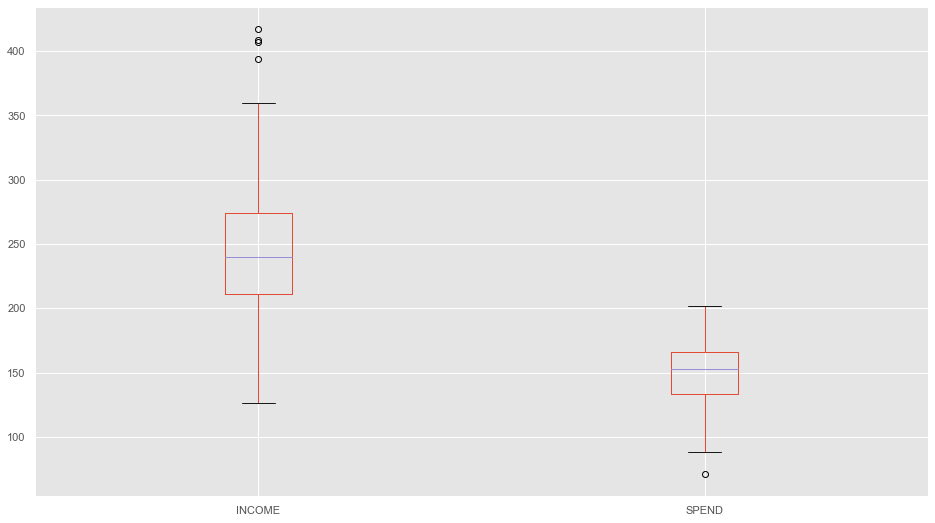

In [15]:
dataset.boxplot()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


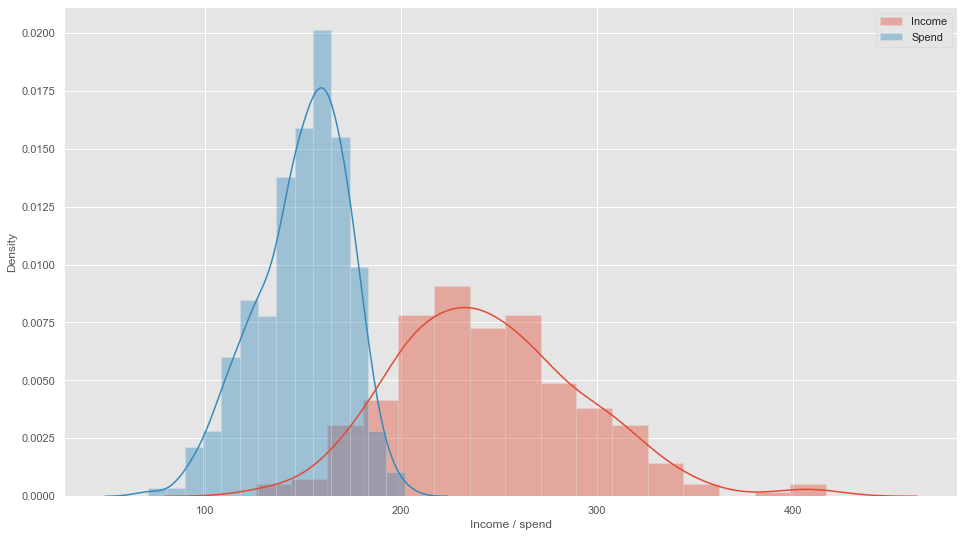

In [16]:
#Visualizing the data - displot
plot_income = sns.distplot(dataset["INCOME"],label="Income") #Plot income
plot_spend = sns.distplot(dataset["SPEND"],label="Spend") #plot spend
plt.xlabel('Income / spend')
plt.legend();

### Unsupervised Machine Learning Model

In [17]:
X = dataset.values #Convert pandas dataframe to numpy homogenous array
#NB this needs to be dataset.values as we apply a numpy technique below

In [18]:
X

array([[233, 150],
       [250, 187],
       [204, 172],
       [236, 178],
       [354, 163],
       [192, 148],
       [294, 153],
       [263, 173],
       [199, 162],
       [168, 174],
       [239, 160],
       [275, 139],
       [266, 171],
       [211, 144],
       [283, 162],
       [219, 158],
       [340, 172],
       [226, 114],
       [247, 171],
       [239, 151],
       [234, 161],
       [233, 179],
       [226, 178],
       [243, 137],
       [199, 178],
       [302, 162],
       [212, 157],
       [175, 123],
       [417, 157],
       [197, 152],
       [198, 168],
       [177, 140],
       [219, 188],
       [273, 152],
       [213, 125],
       [177, 160],
       [304, 170],
       [232, 165],
       [269, 148],
       [360, 151],
       [308, 142],
       [245, 180],
       [208, 148],
       [264, 143],
       [321, 182],
       [325, 172],
       [235, 180],
       [257, 156],
       [216, 115],
       [234, 160],
       [256, 149],
       [302, 151],
       [231,

#### Optimising number of clusters

In [20]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans #Import Kmeans
wcss = [] #within cluster sum of squares
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0) #Build the KMEANS
    km.fit(X) #
    wcss.append(km.inertia_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


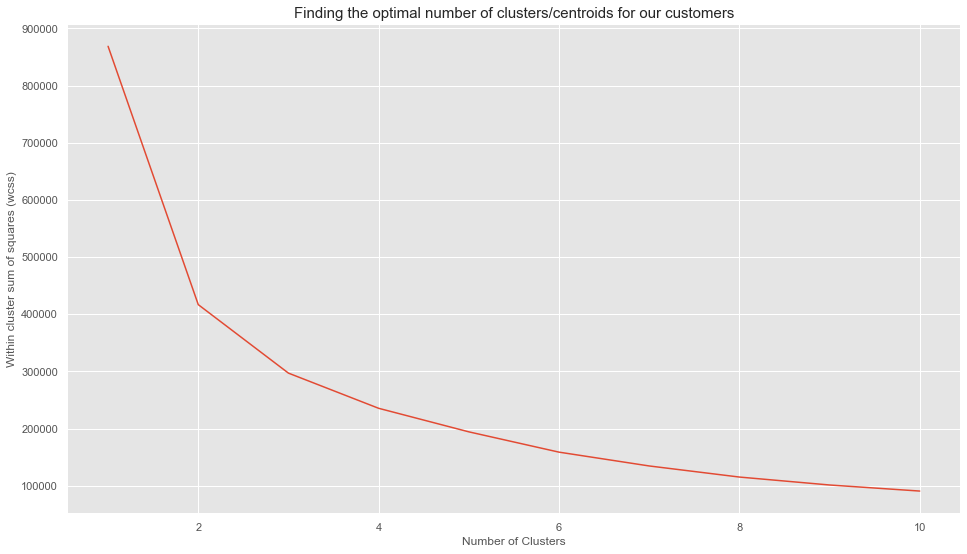

In [21]:
# plot variation of WCSS for k = 1 to 10
plt.plot(range(1, 11), wcss)
plt.title("Finding the optimal number of clusters/centroids for our customers",
         fontdict = {"fontsize" : 15})
plt.xlabel("Number of Clusters")
plt.ylabel("Within cluster sum of squares (wcss)")
plt.show()

In [ ]:
#idea is to look for an inflection point in the above 'elbowplot' i.e a point on 
#the curve where the rate of change of wcss 'slows down'

#Pick the point where the point is sharpest
#The point where the elbow curve stops to drop significantly

### Fit the model

In [22]:
# Fitting kmeans to the dataset with k=4
km4 = KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0) #configure model
y_means = km4.fit_predict(X) #predict and assign the groupings/cluster labels for the data points

y_means

array([3, 3, 2, 3, 1, 2, 1, 3, 2, 2, 3, 0, 3, 2, 3, 2, 1, 0, 3, 3, 3, 3,
       3, 0, 2, 1, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 1, 3, 3, 1, 1, 3, 2, 0,
       1, 1, 3, 3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 1, 0, 1, 2, 2, 2, 2,
       2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 1, 1, 1, 0, 3, 3, 2,
       2, 0, 3, 2, 3, 1, 2, 0, 1, 3, 1, 3, 3, 0, 2, 3, 2, 2, 0, 3, 3, 3,
       1, 2, 1, 2, 3, 2, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 2, 3, 2, 0, 2, 3,
       1, 3, 1, 3, 2, 2, 2, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3,
       2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 2, 0, 0, 3, 3, 2, 3, 3, 1, 3, 2, 2,
       3, 1, 2, 0, 1, 0, 1, 3, 0, 1, 3, 0, 3, 2, 1, 2, 2, 0, 2, 1, 3, 3,
       0, 3, 2, 0, 0, 3, 2, 3, 3, 3, 2, 2, 3, 0, 2, 1, 3, 1, 0, 1, 0, 3,
       1, 0, 3, 0, 0, 2, 0, 2, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 1, 3, 0, 3,
       2, 0, 2, 3, 1, 0, 3, 3, 1, 3, 0, 1, 0, 1, 0, 2, 3, 3, 3, 3, 0, 3,
       2, 2, 1, 2, 0, 0, 3, 3, 0, 3, 0, 2, 0, 0, 1, 2, 1, 2, 2, 3, 2, 1,
       2, 3, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 0, 0, 2,

In [23]:
#create a copy of the dataset
df = dataset.copy() #create copy

#create the cluster label column and assign the groups to each datapoint
df["centroids"] = y_means

df.head()

,INCOME,SPEND,centroids
0,233,150,3
1,250,187,3
2,204,172,2
3,236,178,3
4,354,163,1


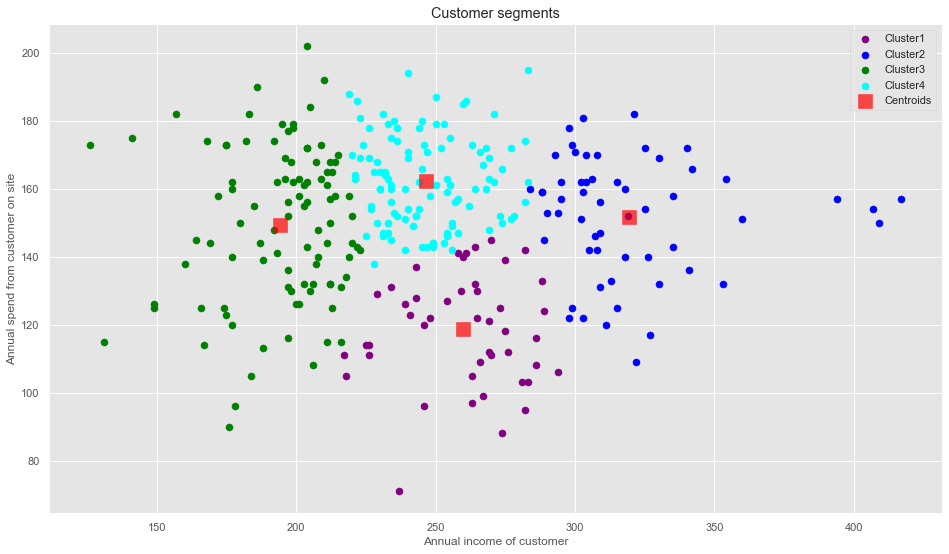

In [24]:
# Visualizing clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()

plt.show()

Changing the Number of clusters

k = 2

In [25]:
# Fitting kmeans to the dataset with k = 2
km4 = KMeans(n_clusters = 2,init='k-means++', max_iter=300, n_init=10, random_state=0) #configure model
y_means = km4.fit_predict(X) #predict and assign the groupings/cluster labels for the data points

y_means

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [26]:
#create a copy of the dataset
df = dataset.copy() #create copy

#create the cluster label column and assign the groups to each datapoint
df["centroids"] = y_means

df.head()

,INCOME,SPEND,centroids
0,233,150,1
1,250,187,1
2,204,172,1
3,236,178,1
4,354,163,0


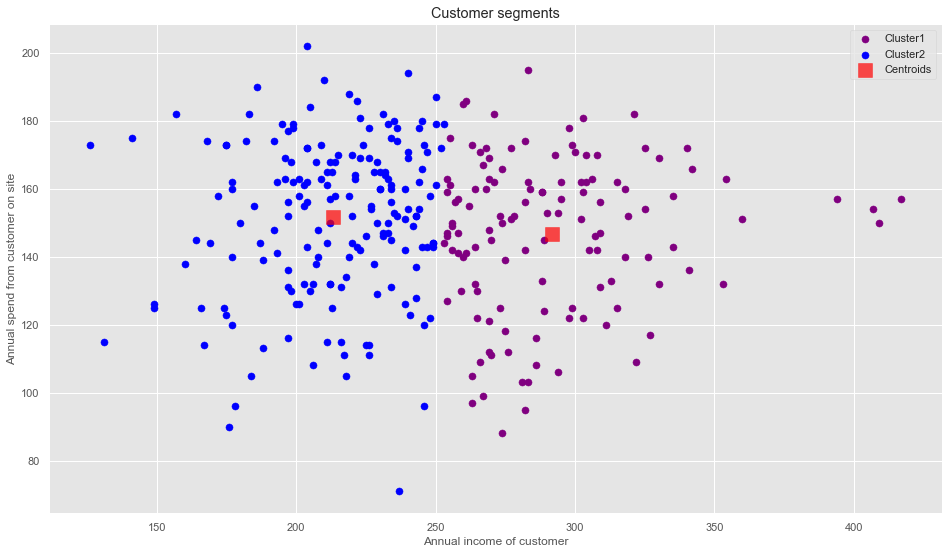

In [27]:
# Visualizing clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
# plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
# plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()

plt.show()

k = 3

In [28]:
# Fitting kmeans to the dataset with k=4
km4 = KMeans(n_clusters= 3,init='k-means++', max_iter=300, n_init=10, random_state=0) #configure model
y_means = km4.fit_predict(X) #predict and assign the groupings/cluster labels for the data points

y_means

array([2, 2, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2,
       1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0,
       2, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0,

In [29]:
#create a copy of the dataset
df = dataset.copy() #create copy

#create the cluster label column and assign the groups to each datapoint
df["centroids"] = y_means

df.head()

,INCOME,SPEND,centroids
0,233,150,2
1,250,187,2
2,204,172,0
3,236,178,2
4,354,163,1


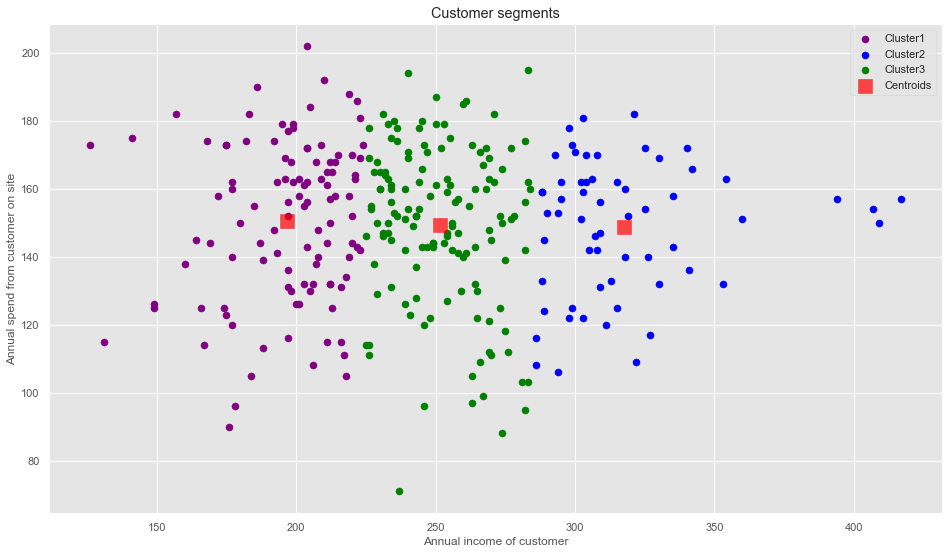

In [30]:
# Visualizing clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
# plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()

plt.show()

k = 6

In [31]:
# Fitting kmeans to the dataset with k=4
km4 = KMeans(n_clusters = 6,init='k-means++', max_iter=300, n_init=10, random_state=0) #configure model
y_means = km4.fit_predict(X) #predict and assign the groupings/cluster labels for the data points

y_means

array([4, 4, 3, 4, 5, 3, 2, 4, 3, 3, 4, 0, 4, 1, 2, 4, 5, 1, 4, 4, 4, 4,
       4, 4, 3, 2, 3, 1, 5, 3, 3, 1, 3, 2, 1, 3, 2, 4, 4, 5, 2, 4, 3, 0,
       2, 2, 4, 4, 1, 4, 4, 2, 4, 3, 4, 3, 4, 4, 3, 2, 0, 2, 3, 1, 3, 3,
       4, 4, 4, 3, 4, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 2, 2, 2, 0, 4, 2, 3,
       3, 0, 4, 3, 4, 2, 1, 1, 5, 4, 2, 4, 4, 0, 3, 4, 3, 1, 4, 4, 4, 4,
       2, 3, 2, 3, 4, 3, 3, 3, 3, 4, 2, 4, 4, 4, 3, 3, 1, 2, 3, 0, 3, 4,
       2, 4, 2, 4, 1, 1, 1, 0, 2, 2, 3, 4, 1, 4, 4, 4, 4, 3, 4, 1, 4, 2,
       4, 1, 4, 3, 4, 4, 4, 5, 3, 3, 3, 0, 4, 4, 4, 3, 4, 4, 2, 4, 1, 1,
       4, 5, 1, 0, 5, 1, 2, 4, 0, 2, 4, 0, 4, 3, 2, 1, 1, 2, 3, 2, 4, 4,
       0, 4, 3, 0, 0, 2, 1, 4, 4, 4, 1, 3, 4, 0, 1, 2, 4, 5, 0, 2, 0, 4,
       5, 1, 2, 2, 0, 1, 0, 1, 2, 2, 4, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 4,
       1, 0, 1, 2, 5, 0, 2, 4, 2, 4, 0, 2, 0, 2, 0, 1, 4, 4, 4, 4, 0, 4,
       1, 1, 2, 1, 0, 0, 4, 4, 0, 4, 0, 3, 1, 0, 2, 1, 2, 3, 1, 4, 1, 2,
       3, 4, 5, 1, 3, 2, 4, 3, 1, 1, 1, 1, 0, 0, 1,

In [32]:
#create a copy of the dataset
df = dataset.copy() #create copy

#create the cluster label column and assign the groups to each datapoint
df["centroids"] = y_means

df.head()

,INCOME,SPEND,centroids
0,233,150,4
1,250,187,4
2,204,172,3
3,236,178,4
4,354,163,5


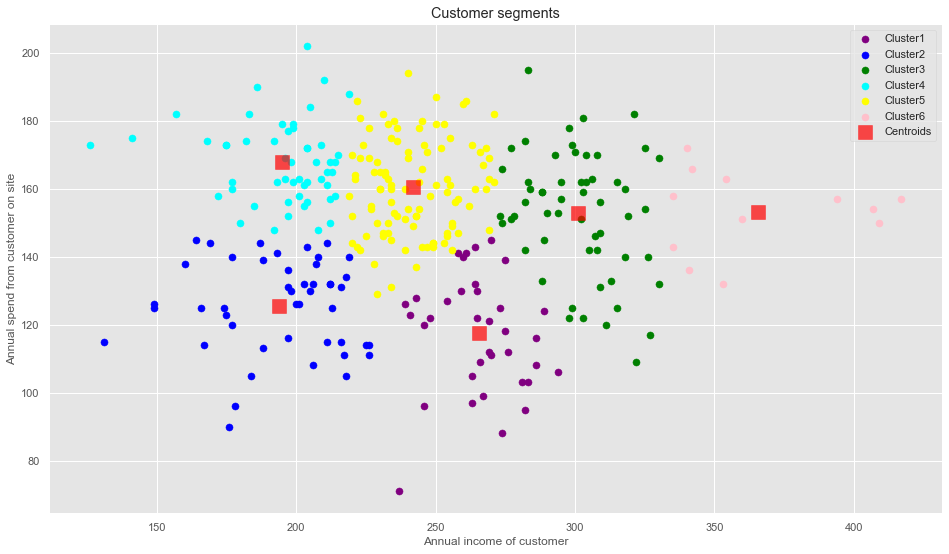

In [33]:
# Visualizing clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='yellow',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='pink',label='Cluster6')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()

plt.show()